# Analyzing and Classifying Stroke Disease Using Machine Learning

#### The project aims to predict the likelihood of stroke in an individual.
#### The data is taken from Kaggle. The dataset is named Stroke Prediction Dataset.
#### The datset contains columns like: id, gender, age, hypertension, heart disease, evermarried, worktype, residence type, glucose level, bmi, smoking status, stroke.

In [230]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
import sklearn as sk
print(sk.__version__)

1.5.1


In [232]:
#read the data
data = pd.read_csv('C:/Users/Asus/Downloads/SPdata/healthcare-dataset-stroke.csv')

In [233]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [234]:
data.shape

(5110, 12)

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Exploratory Data Analysis (EDA)

In [236]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


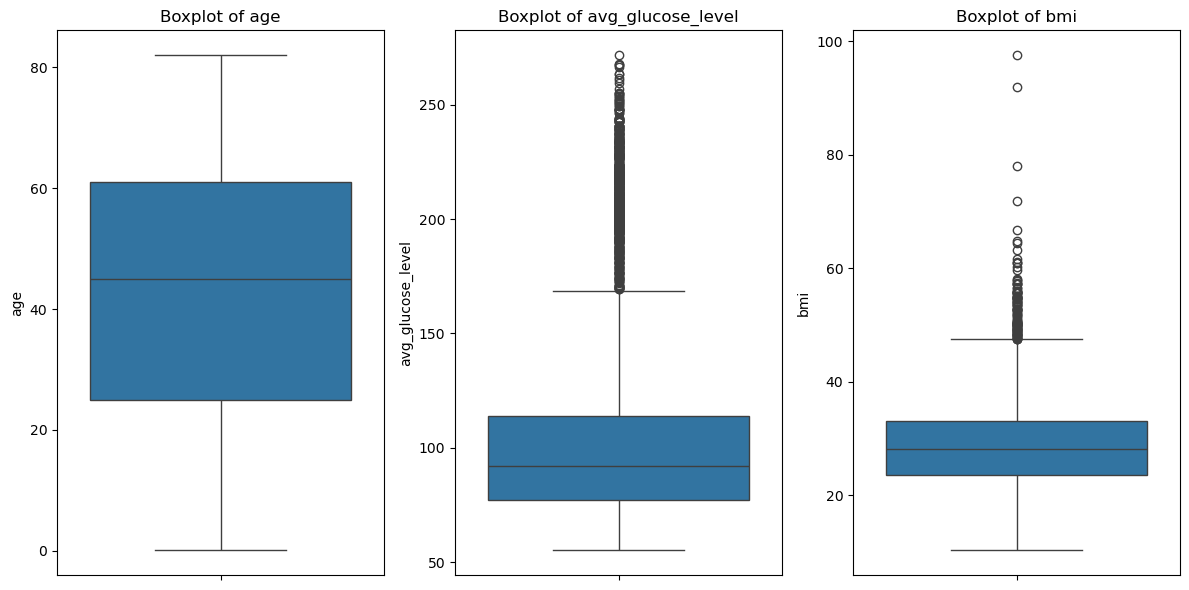

In [237]:
num_value = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_value):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [238]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [239]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_32568\3685616333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [240]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

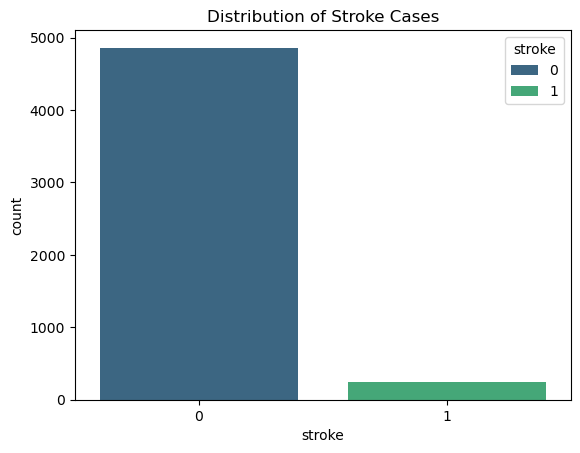

In [241]:
sns.countplot(x='stroke', hue='stroke', data=data, palette='viridis')
plt.title('Distribution of Stroke Cases')
plt.show()

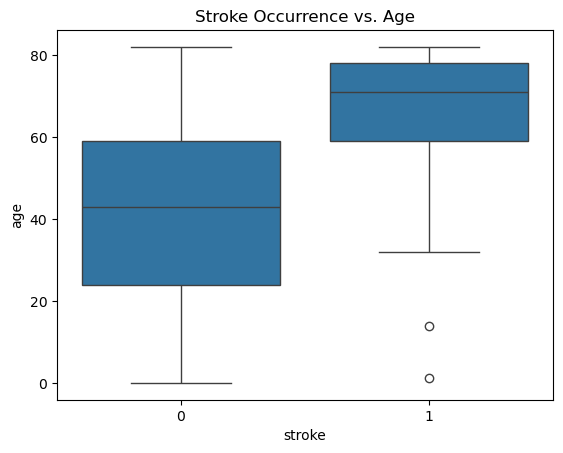

In [242]:
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Stroke Occurrence vs. Age')
plt.show()

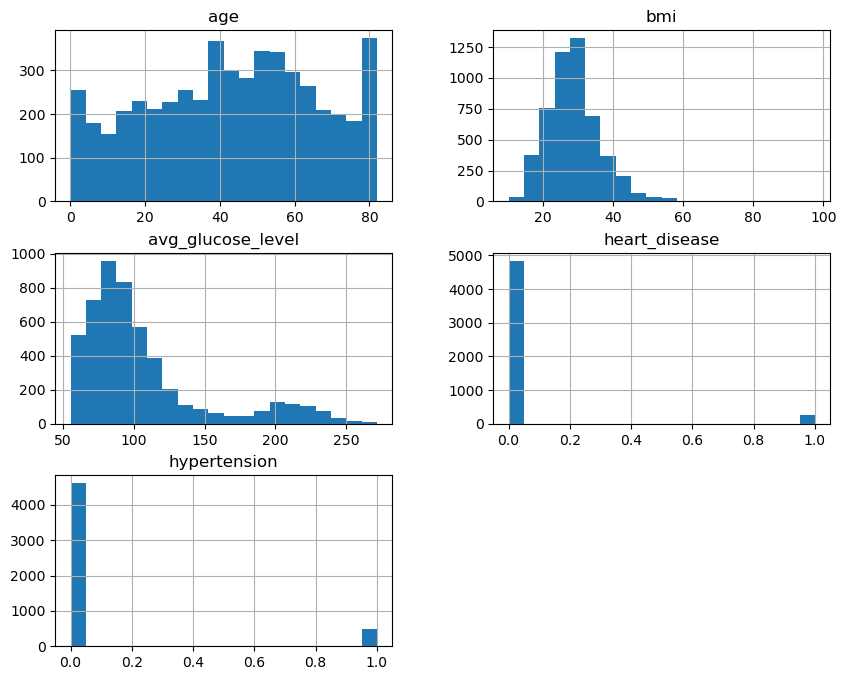

In [243]:
columns = ['age', 'gender', 'ever_married', 'bmi', 'avg_glucose_level', 'heart_disease', 'hypertension']
data[columns].hist(bins=20, figsize=(10,8))
plt.show()

In [244]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the gender column
data['gender'] = le.fit_transform(data['gender'])

In [245]:
le = LabelEncoder()

# Fit and transform the ever_married column
data['ever_married'] = le.fit_transform(data['ever_married'])

In [246]:
le = LabelEncoder()

# Fit and transform the residence_type column
data['Residence_type'] = le.fit_transform(data['Residence_type'])

In [247]:
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'], drop_first=True)

In [248]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,False,True,False,False,False,True,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,False,True,False,False,False,False,True
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False
5,56669,1,81.0,0,0,1,1,186.21,29.000000,1,False,True,False,False,True,False,False
6,53882,1,74.0,1,1,1,0,70.09,27.400000,1,False,True,False,False,False,True,False
7,10434,0,69.0,0,0,0,1,94.39,22.800000,1,False,True,False,False,False,True,False
8,27419,0,59.0,0,0,1,0,76.15,28.893237,1,False,True,False,False,False,False,False
9,60491,0,78.0,0,0,1,1,58.57,24.200000,1,False,True,False,False,False,False,False


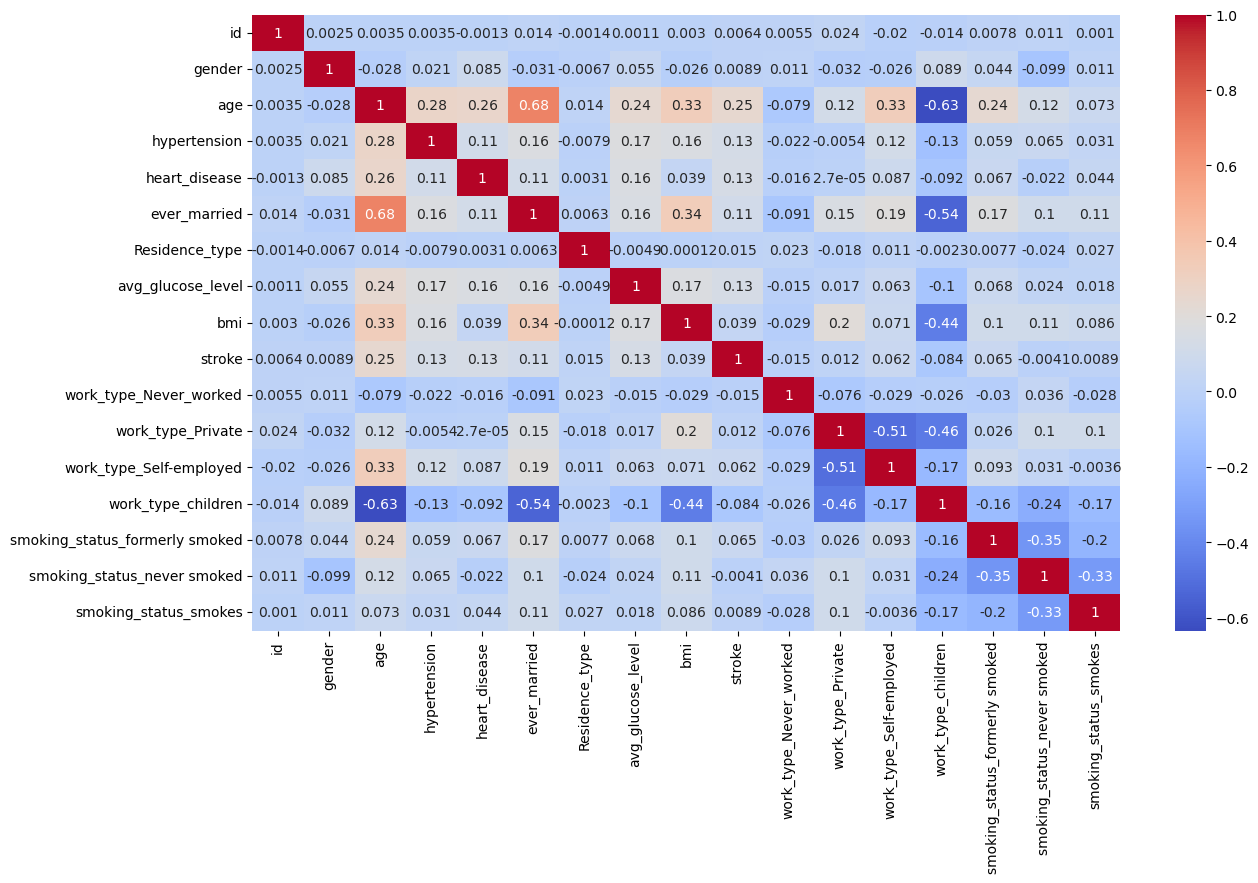

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()  # Assuming `dataset` is your dataframe
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [250]:
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

In [252]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification Report
print(classification_report(y_test, y_pred))

[[925  35]
 [ 54   8]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.19      0.13      0.15        62

    accuracy                           0.91      1022
   macro avg       0.57      0.55      0.55      1022
weighted avg       0.90      0.91      0.91      1022



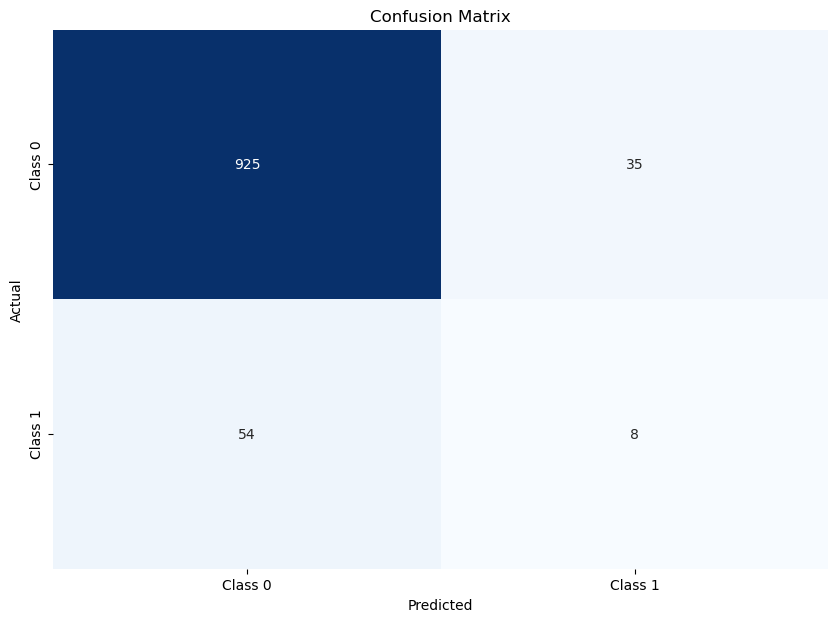

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Example for Decision Tree

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[958   2]
 [ 61   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



C:\Users\Asus\AppData\Roaming\mljar-studio\jlab_server\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


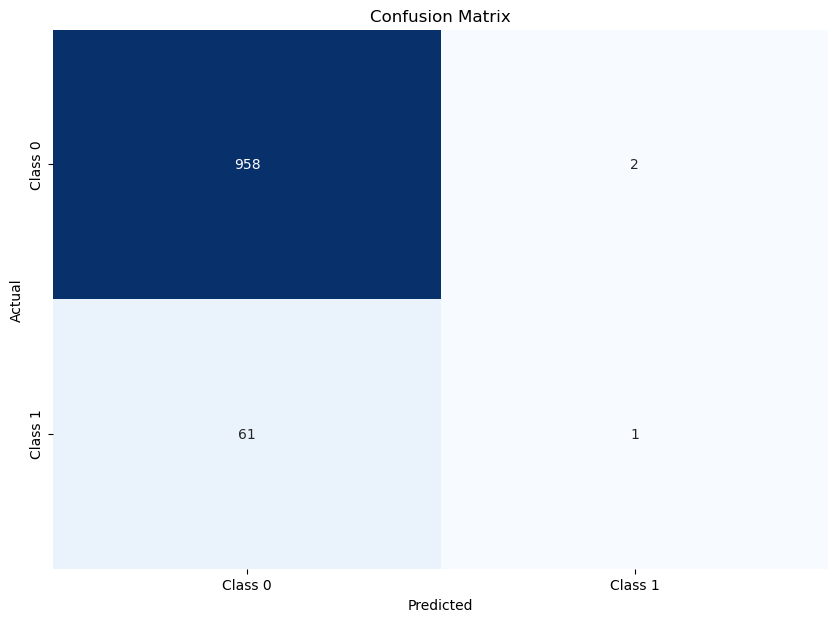

In [215]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
cm = confusion_matrix(y_test, y_pred_logreg)  
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Before SMOTE
[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Asus\AppData\Roaming\mljar-studio\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\mljar-studio\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\mljar-studio\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

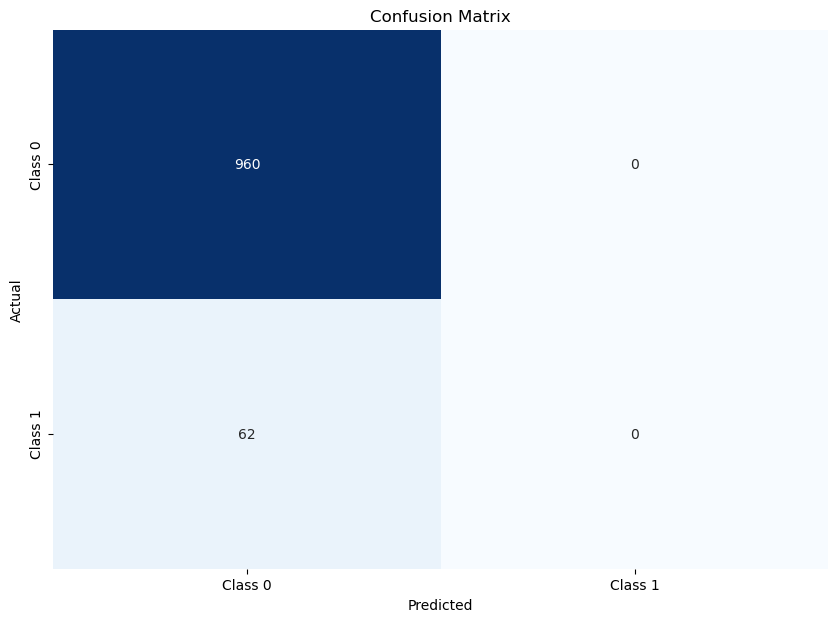

In [216]:
from sklearn.svm import SVC

# Initialize SVM model (with probability output for ROC curve later)
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print('SVM Before SMOTE')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)  
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [153]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


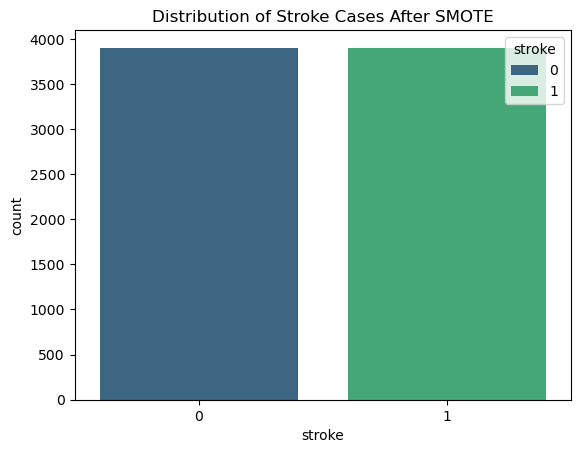

In [167]:
import pandas as pd

resampled_data = pd.concat([X_train_res, y_train_res], axis=1)

# Plot the distribution of stroke cases after SMOTE
sns.countplot(x='stroke', hue='stroke', data=resampled_data, palette='viridis')
plt.title('Distribution of Stroke Cases After SMOTE')
plt.show()

In [154]:
# Train Decision Tree after SMOTE
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_dt_smote = dt_smote.predict(X_test)

# Evaluate the model
print('Decision Tree After SMOTE')
print(confusion_matrix(y_test, y_pred_dt_smote))
print(classification_report(y_test, y_pred_dt_smote))

Decision Tree After SMOTE
[[869  91]
 [ 47  15]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.14      0.24      0.18        62

    accuracy                           0.86      1022
   macro avg       0.55      0.57      0.55      1022
weighted avg       0.90      0.86      0.88      1022



In [155]:
# Train Logistic Regression after SMOTE
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_logreg_smote = logreg_smote.predict(X_test)

# Evaluate the model
print('Logistic Regression After SMOTE')
print(confusion_matrix(y_test, y_pred_logreg_smote))
print(classification_report(y_test, y_pred_logreg_smote))

Logistic Regression After SMOTE
[[768 192]
 [ 30  32]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       960
           1       0.14      0.52      0.22        62

    accuracy                           0.78      1022
   macro avg       0.55      0.66      0.55      1022
weighted avg       0.91      0.78      0.83      1022



C:\Users\Asus\AppData\Roaming\mljar-studio\jlab_server\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
# Train SVM after SMOTE
svm_smote = SVC(probability=True, random_state=42)
svm_smote.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_svm_smote = svm_smote.predict(X_test)

# Evaluate the model
print('SVM After SMOTE')
print(confusion_matrix(y_test, y_pred_svm_smote))
print(classification_report(y_test, y_pred_svm_smote))

SVM After SMOTE
[[660 300]
 [ 41  21]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       960
           1       0.07      0.34      0.11        62

    accuracy                           0.67      1022
   macro avg       0.50      0.51      0.45      1022
weighted avg       0.89      0.67      0.75      1022



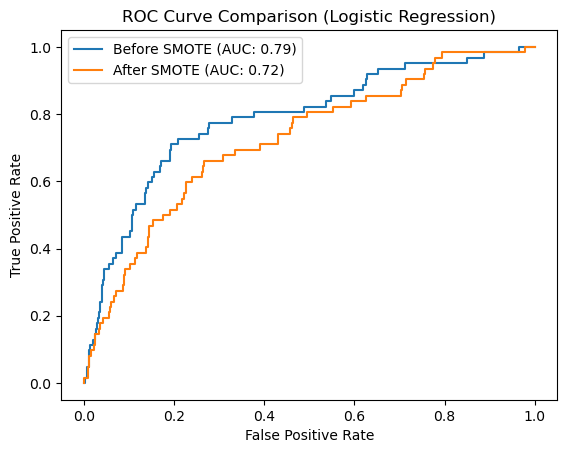

In [160]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve before and after SMOTE
y_prob_before = logreg.predict_proba(X_test)[:, 1]
y_prob_after = logreg_smote.predict_proba(X_test)[:, 1]

fpr_before, tpr_before, _ = roc_curve(y_test, y_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_prob_after)

plt.plot(fpr_before, tpr_before, label=f'Before SMOTE (AUC: {roc_auc_score(y_test, y_prob_before):.2f})')
plt.plot(fpr_after, tpr_after, label=f'After SMOTE (AUC: {roc_auc_score(y_test, y_prob_after):.2f})')

plt.title('ROC Curve Comparison (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


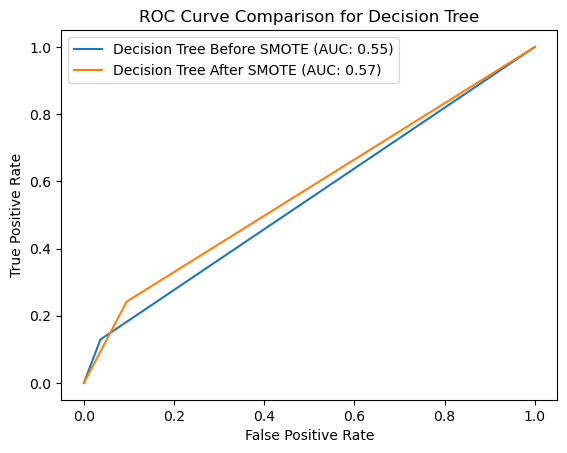

In [161]:

from sklearn.metrics import roc_curve, roc_auc_score
y_prob_before = dt.predict_proba(X_test)[:, 1]
y_prob_after = dt_smote.predict_proba(X_test)[:, 1]

fpr_before, tpr_before, _ = roc_curve(y_test, y_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_prob_after)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_before, tpr_before, label=f'Decision Tree Before SMOTE (AUC: {roc_auc_score(y_test, y_prob_before):.2f})')
plt.plot(fpr_after, tpr_after, label=f'Decision Tree After SMOTE (AUC: {roc_auc_score(y_test, y_prob_after):.2f})')

plt.title('ROC Curve Comparison for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

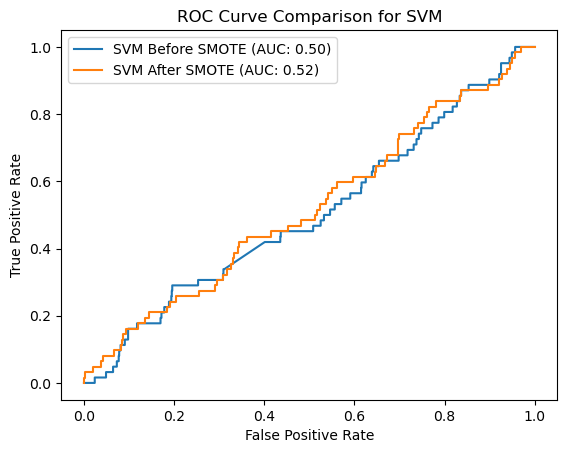

In [217]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_before = svm_smote.predict_proba(X_test)[:, 1]
y_prob_after = svm.predict_proba(X_test)[:, 1]

fpr_before, tpr_before, _ = roc_curve(y_test, y_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_prob_after)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_before, tpr_before, label=f'SVM Before SMOTE (AUC: {roc_auc_score(y_test, y_prob_before):.2f})')
plt.plot(fpr_after, tpr_after, label=f'SVM After SMOTE (AUC: {roc_auc_score(y_test, y_prob_after):.2f})')

plt.title('ROC Curve Comparison for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()